In [1]:
from models import *
from util import *
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
ntfm = get_problem_features(['m4-tsfeatures.csv', 'm4-catch22features.csv'])
pdf = get_problem_algorithm_performance()

In [3]:
run=0
feature_correlation_threshold=0.4

X_train, X_test, Y_train, Y_test = train_test_split(ntfm, pdf, test_size=0.2, random_state=run)
    

drop_columns = set(find_correlation(X_train, thresh=feature_correlation_threshold))
X_train = X_train.drop(columns=drop_columns)
X_test = X_test.drop(columns=drop_columns)
remain_columns=X_test.columns.to_list()
        
#X_train, X_test, Y_train, Y_test = X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()
 

    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=remain_columns)
X_test = pd.DataFrame(X_test, columns=remain_columns)
    
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, Y_train: {Y_train.shape}, Y_test: {Y_test.shape}')

X_train: (80000, 50), X_test: (20000, 50), Y_train: (80000, 61), Y_test: (20000, 61)


In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 100))
model.fit(X_train, Y_train)

print(mean_absolute_error(Y_test, model.predict(X_test)))

0.07316425830255034


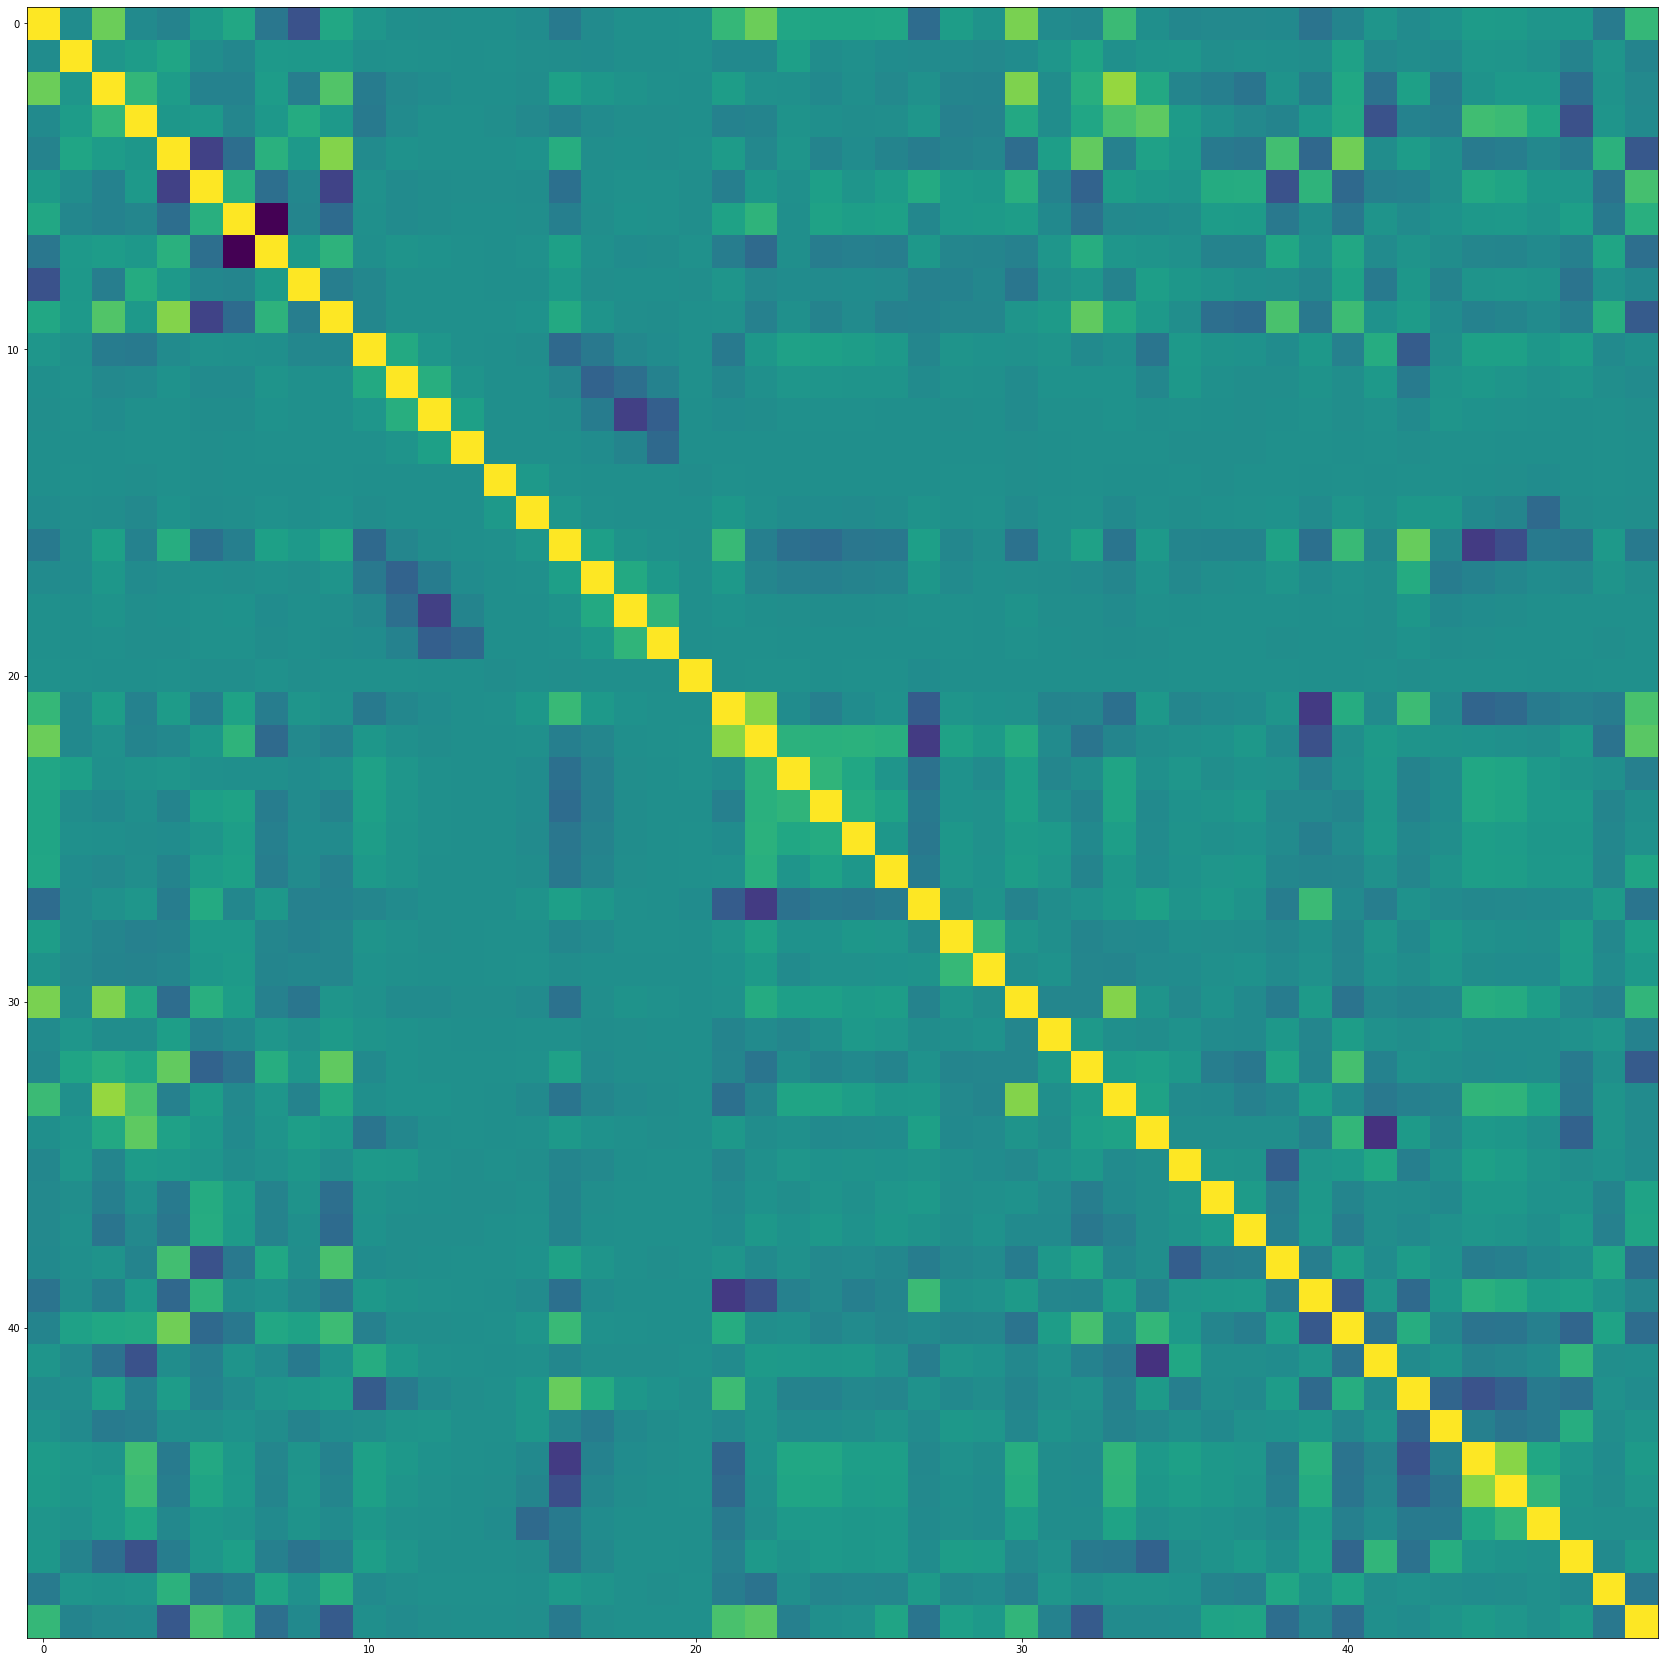

In [5]:
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
#np.fill_diagonal(corr, 1)

fig, ax1 = plt.subplots(1, 1, figsize=(30, 30))
ax1.imshow(corr)

In [ ]:
from collections import defaultdict
import multiprocessing
import pickle
import os.path

d = defaultdict(lambda: [])
rep=300

direrctory='drop-features'
Path(direrctory).mkdir(parents=True, exist_ok=True)

for column in remain_columns:   
    path = f'{direrctory}/f_{column}.p'
    
    if os.path.isfile(path)==False:
        print(f'Calculate {column}')
    
        for r in range(rep):
            l = set(remain_columns)
            l.remove(column)

            model = MLPRegressor(hidden_layer_sizes=(100, 100))
            model.fit(X_train[l], Y_train)

            error = mean_absolute_error(Y_test, model.predict(X_test[l]))

            d[column].append(error)
        pickle.dump(d[column], open(path, 'wb'))
        
    else:
        print(f'Skip {column}')
        
    
        
#for r in range(rep):
#    model = MLPRegressor(hidden_layer_sizes=(100, 100))
#    model.fit(X_train, Y_train)
#
#    error = mean_absolute_error(Y_test, model.predict(X_test))
#
#    d[None].append(error)

Skip value__abs_energy
Skip value__mean_second_derivative_central
Skip value__standard_deviation
Skip value__skewness
Skip value__last_location_of_maximum
Skip value__first_location_of_minimum
Skip value__percentage_of_reoccurring_values_to_all_values
Skip value__ratio_value_number_to_time_series_length
Skip value__benford_correlation
Skip value__time_reversal_asymmetry_statistic__lag_1
Skip value__symmetry_looking__r_0.1
Skip value__symmetry_looking__r_0.2
Skip value__symmetry_looking__r_0.30000000000000004
Skip value__symmetry_looking__r_0.45
Skip value__large_standard_deviation__r_0.05
Skip value__large_standard_deviation__r_0.1
Skip value__large_standard_deviation__r_0.25
Skip value__large_standard_deviation__r_0.35000000000000003
Skip value__large_standard_deviation__r_0.4
Skip value__large_standard_deviation__r_0.45
Skip value__autocorrelation__lag_0
Skip value__autocorrelation__lag_2
Skip value__agg_autocorrelation__f_agg_"median"__maxlag_40
Skip value__partial_autocorrelation__

In [ ]:
import pickle
pickle.dump(dict(d), open('feature_drop_performance.p', 'wb'))

In [ ]:
runs = pickle.load(open('feature_drop_performance.p', 'rb'))

In [ ]:
for k, v in runs.items():
    print(k, np.median(v))

In [ ]:
#import multiprocessing
#
#def sumall(value):
#    return sum(range(1, value + 1))
#
#pool_obj = multiprocessing.Pool(4)
#
#answer = pool_obj.map(sumall,range(0,50))
#print(answer)